 Load the Dataset

In [ ]:
import pandas as pd

# Load the preprocessed dataset
df = pd.read_csv("Data/features_30_sec.csv")

# Drop filename column
df = df.drop(columns=['filename'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop(['label'], axis=1).values
y = df['label'].values

# Encode string labels (genre names) into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


Build and Train the PyTorch Model

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

class GenreClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(GenreClassifier, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)

# Create the model
model = GenreClassifier(input_dim=X_train.shape[1], num_classes=len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


 Training Loop

In [ ]:
for epoch in range(50):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 1, Loss: 32645.8770
Epoch 2, Loss: 23643.5000
Epoch 3, Loss: 23713.3750
Epoch 4, Loss: 16328.0498
Epoch 5, Loss: 13814.5986
Epoch 6, Loss: 11384.9229
Epoch 7, Loss: 14282.9648
Epoch 8, Loss: 12831.1084
Epoch 9, Loss: 13071.8975
Epoch 10, Loss: 11789.5166
Epoch 11, Loss: 11483.9160
Epoch 12, Loss: 10800.4463
Epoch 13, Loss: 9005.5986
Epoch 14, Loss: 8211.1465
Epoch 15, Loss: 7860.0269
Epoch 16, Loss: 7357.7207
Epoch 17, Loss: 7355.7407
Epoch 18, Loss: 5915.3662
Epoch 19, Loss: 4878.3706
Epoch 20, Loss: 4520.5933
Epoch 21, Loss: 3818.4629
Epoch 22, Loss: 4206.0317
Epoch 23, Loss: 5010.2954
Epoch 24, Loss: 4225.4468
Epoch 25, Loss: 3029.1160
Epoch 26, Loss: 3220.9524
Epoch 27, Loss: 3459.7468
Epoch 28, Loss: 3583.2512
Epoch 29, Loss: 3211.9312
Epoch 30, Loss: 2580.1978
Epoch 31, Loss: 2577.8662
Epoch 32, Loss: 2788.6450
Epoch 33, Loss: 2778.5481
Epoch 34, Loss: 2394.3171
Epoch 35, Loss: 2147.4329
Epoch 36, Loss: 2161.3013
Epoch 37, Loss: 1989.3970
Epoch 38, Loss: 1898.0771
Epoch 39,

Evaluate the Model

In [5]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_tensor, predicted_classes)
print(f"Test Accuracy: {acc * 100:.2f}%")


Test Accuracy: 21.00%


Confusion Matrix

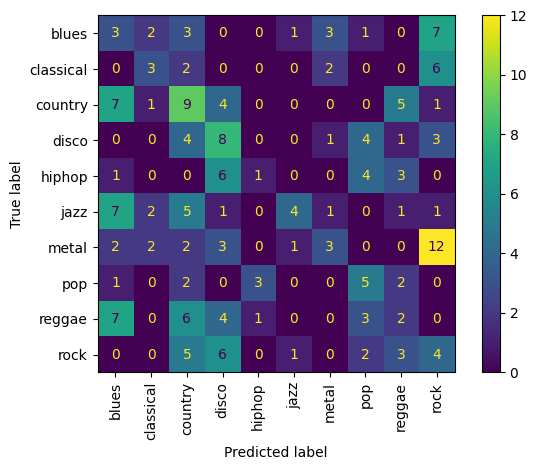

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(xticks_rotation='vertical')
plt.tight_layout()
plt.show()


Scaling the features to improve the test accuracy

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Then split again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


Improving the neural netwrok

In [8]:
class GenreClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.net(x)


In [ ]:
losses = []
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Epoch 10, Loss: 1174.4644
Epoch 20, Loss: 1173.1414
Epoch 30, Loss: 1482.5759
Epoch 40, Loss: 725.0150
Epoch 50, Loss: 1254.5493
Epoch 60, Loss: 2062.8896
Epoch 70, Loss: 1454.4005
Epoch 80, Loss: 1403.5292
Epoch 90, Loss: 939.4149
Epoch 100, Loss: 1219.9683


Plotting the loss curve

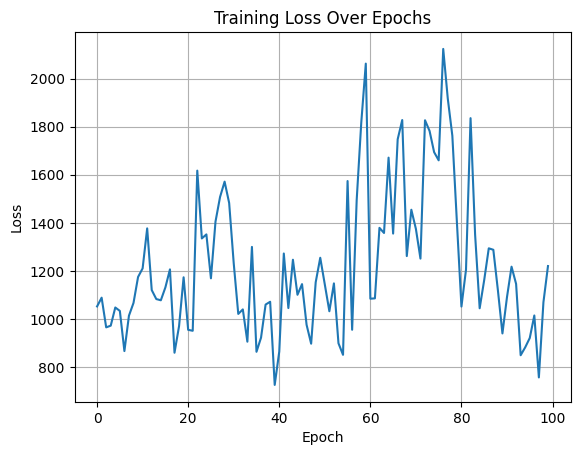

In [10]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


Accuracy did not increase so preprocessing it again

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("Data/features_30_sec.csv")
df = df.drop(columns=['filename'])

# Separate features and labels
X = df.drop(columns=['label'])
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Label encode genres
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)


Upgrading the model

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class GenreClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.net(x)


Using DataLoader for Efficient Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Wrap in a DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


Training Loop

In [14]:
model = GenreClassifier(input_dim=X_train.shape[1], num_classes=len(le.classes_))
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    total_loss = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 10, Loss: 10.7941
Epoch 20, Loss: 5.5443
Epoch 30, Loss: 3.2390
Epoch 40, Loss: 1.9034
Epoch 50, Loss: 1.6702
Epoch 60, Loss: 1.6998
Epoch 70, Loss: 1.4675
Epoch 80, Loss: 0.8194
Epoch 90, Loss: 1.0532
Epoch 100, Loss: 0.9018


Evaluate

In [16]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_tensor, predicted_classes)
print(f" Test Accuracy: {acc * 100:.2f}%")


 Test Accuracy: 74.50%


Saving the model

In [17]:
torch.save(model.state_dict(), 'genre_classifier.pth')


Making predections on New Data

In [18]:
model.load_state_dict(torch.load('genre_classifier.pth'))
model.eval()

# For a new track's features:
new_track = torch.tensor([X_test[0]], dtype=torch.float32)
prediction = model(new_track)
predicted_label = le.inverse_transform([torch.argmax(prediction).item()])
print("Predicted genre:", predicted_label[0])


Predicted genre: jazz


C:\Users\akash\AppData\Local\Temp\ipykernel_25752\1049683373.py:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  new_track = torch.tensor([X_test[0]], dtype=torch.float32)
